<a href="https://colab.research.google.com/github/MAlHafiz/Pembelajaran-Mesin_Muhammad-Al-Hafiz_2211533010/blob/main/Agglomerativ_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
# Basic statistical details

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#Missing data check

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Removing duplicate rows

print('Duplicate Rows Count : ', df.duplicated().sum())

df=df.drop_duplicates(keep="first")

Duplicate Rows Count :  0


In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df["Gender"] = df["Gender"].astype('category').cat.codes
df.drop('CustomerID',axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
columns_scaler = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

MinMax= MinMaxScaler()

df_minmax = df.copy()

df_minmax[columns_scaler]=MinMax.fit_transform(df_minmax[columns_scaler])

In [12]:
pca = PCA(n_components = 2 )
pca.fit(df_minmax)
df_pca = pca.transform(df_minmax)
df_pca = pd.DataFrame(df_pca, columns = ['P1', 'P2'])

Text(0, 0.5, 'PCA 2')

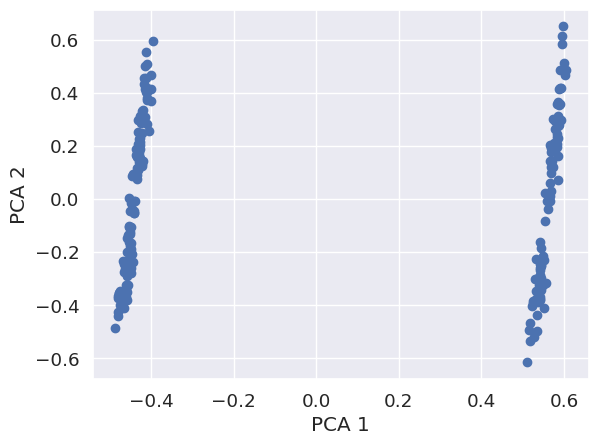

In [13]:
# Visualization before clustering

plt.scatter(df_pca.P1, df_pca.P2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

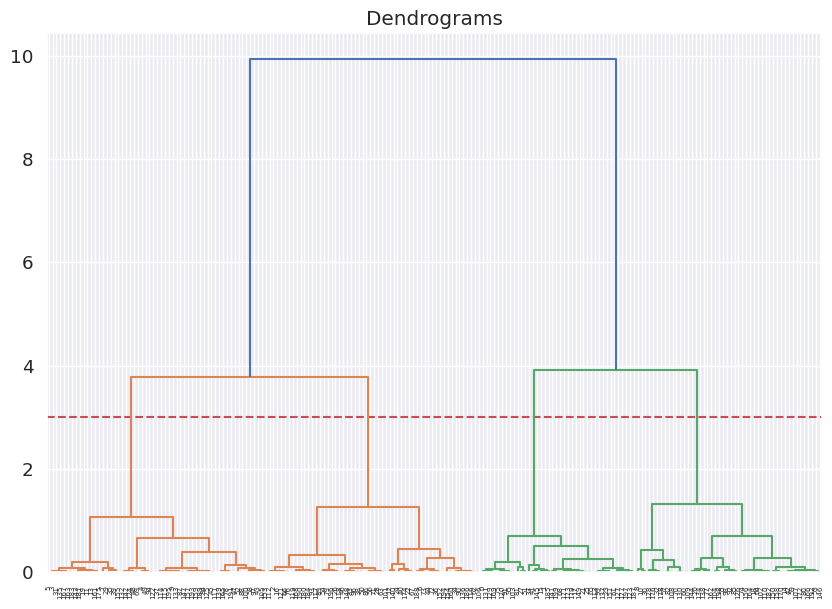

In [14]:
plt.figure(figsize = (10,7))
plt.title('Dendrograms')
plt.axhline(y=3, color='r', linestyle='--')
dend = sch.dendrogram(sch.linkage(df_pca, method='ward'))

In [15]:
# The n_clusters parameter is determined from the Dendrogram.

model = AgglomerativeClustering(n_clusters = 4)

y_means = model.fit_predict(df_pca)

In [16]:
silhouette = silhouette_score(df_pca, y_means)
print('Silhouette Score: ', silhouette )

davies_bouldin = davies_bouldin_score(df_pca, y_means)
print('Davies Bouldin Score: ', davies_bouldin )

Silhouette Score:  0.6865138951386933
Davies Bouldin Score:  0.40911039819814365


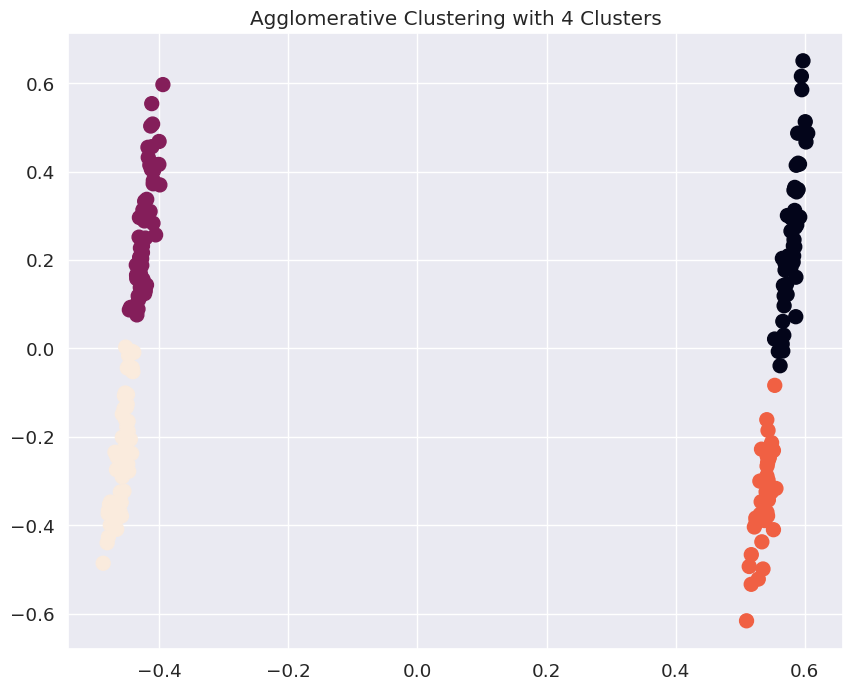

In [17]:
# Visualization of the result

plt.figure(figsize=(10, 8))

plt.title('Agglomerative Clustering with 4 Clusters')

plt.scatter(df_pca.P1, df_pca.P2, c=y_means, s=100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


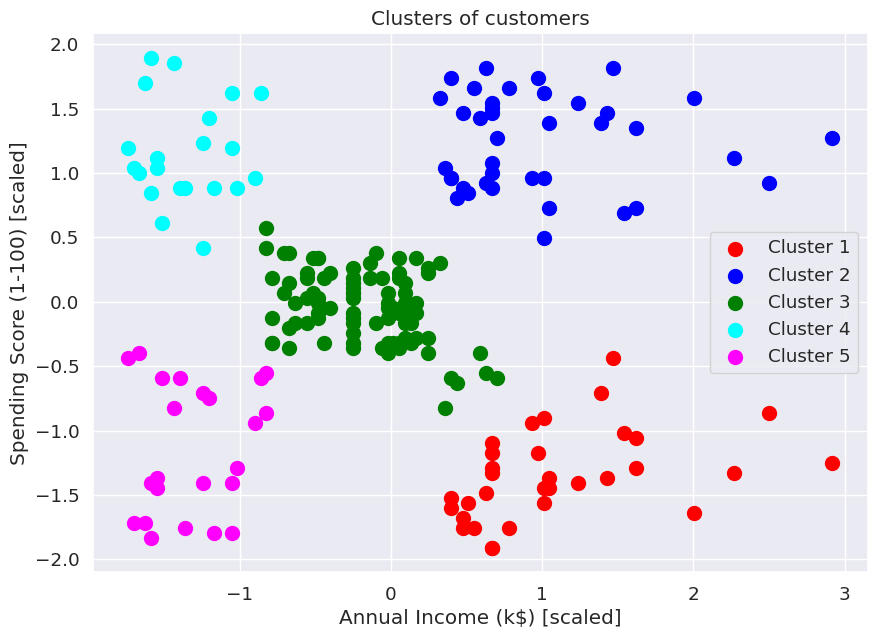

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Membaca data
df = pd.read_csv('Mall_Customers.csv')

# Memilih fitur yang akan digunakan untuk clustering
# Sebagai contoh, kita akan menggunakan Annual Income dan Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Membuat model Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agglomerative = agglomerative_clustering.fit_predict(X_scaled)

# Menambahkan hasil clustering ke dalam dataframe
df['Cluster'] = y_agglomerative

# Plotting hasil clustering
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[y_agglomerative == 0, 0], X_scaled[y_agglomerative == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_agglomerative == 1, 0], X_scaled[y_agglomerative == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_agglomerative == 2, 0], X_scaled[y_agglomerative == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_agglomerative == 3, 0], X_scaled[y_agglomerative == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_agglomerative == 4, 0], X_scaled[y_agglomerative == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$) [scaled]')
plt.ylabel('Spending Score (1-100) [scaled]')
plt.legend()
plt.show()
